# MTH-575 Report-1

## Conservation Law


A (scalar) conservation law can be derived by equating the rate of change of the volume integral of a quantity to the flux into and from the boundaries of the said volume. In 1D, this can be written as,

$$\frac{d}{dt}\int_a^b u(x,t) dx = f(u(a,t)) - f(u(b,t))$$

If the limits are time independent, the time derivative can be taken into the integral. And the right hand side can be written as the volume integral of the divergence of the flux function. Again in 1D, this can be written as (these steps assume that both the quantity $u(x,t)$ and the flux $f(x,t)$ are sufficiently smooth),

$$\int_a^b \frac{\partial}{\partial t} u(x,t) dx = -\int_a^b \frac{\partial}{\partial x} f(u(b,t)) dx$$

Bringing everything to the LHS and then imposing the equality to $0$ for arbitrary volumes, the conservation law in differential form can be written as,

- $$u_t + f(u)_x = 0$$


## Characteristics and Shock Formation


A characteristic is the line $x=x(t)$ which obeys the following,
\begin{align}
\frac{dx(t)}{dt} &= f_u(u(x(t),t))\\
x(0) &= x^{0}
\end{align}

The point $x^{0}$ evolves along these trajectories. For a 1D scalar conservation law,
$$\frac{du(x(t),t)}{dt} = u_t + u_xf_u(u(x(t),t)) = u_t + f_x(u(x(t),t)) = 0$$
The last equality holds because that is exactly the conservation law.

This implies that $u(x,t) = u(x^0,0) = u^0$ is a constant along these characteristics.

Sometimes for non-linear-hyperbolic equations, these characteristics cross over after some time. And at that time shock forms at that location due to the slope at that point becoming infinite. The "wave" solution breaks and at times after the time at which the characteristics cross do not have a classical solution to the PDE. This necessarily happens when the $u_x(x,0)<0$.

## Weak Solutions


If initial solution is not smooth or continuous, derivatives are not defined for it. But the requirement of differentiabilty can be forgone, and a "weak" solution can be constructed by doing the following.

Let $\phi$ be a test function in the space of continuosly differential functions with compact support, $\phi\in C^1_0(\mathbb{R} \times \mathbb{R})$, then we mutiply the conservation law with $\phi$ and integrate over all space and (+ve) times. This gives,

$$\int_0^{\infty}\int_{-\infty}^{\infty} \phi(x,t)[u_t + f_x(u)] dx dt= 0$$

$\implies$

$$ \int_0^{\infty}\int_{-\infty}^{\infty} \phi(x,t)[u_t + f_x(u)] dx dt + \int_{-\infty}^{\infty} \phi(x,0) u(x,0) dx = 0 $$

But unfortunately, weak solutions are often non-unique. There are further conditions (**entropy conditions**) inmposed on the problem to ensure that this "weak" solution formalism gives correct classical solutions. These will be studies over the next few weeks.

## Advection Equation


For $f(u) = au$ ($a$ is a consant), the 1D scalar advection equation reduces to, 
$$\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0$$
which is just the advection (or convection) equation.

For a given initial condition $u(x,0) = u^0(x)$, this equation has a known solution $u(x-at)$. 

Since this is a partial differntial equation of order-$1$ in space as well, $1$ boundary condition has to be specified as well. This is different for different solutions, as in, for right moving (+ve) and left moving (-ve) solutions, the left and right boundaries are specified. 

## Numerical Solution to the Advection Equation

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time
import math as mt

del_t = 0.1
del_x = 0.1
a = 1
K = (a*del_t/del_x)

x_i = -20
x_f = 20
t_i = 0
t_f = 20

eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)

U = np.zeros(shape=(len(T), len(X)))
wid = 4
U[0,:] = np.exp(-X**2/wid)

### Forward Time Centered Space:

A naive method to solve this equation using finite differences would be to use forward-time-centered-space method. In the usual notation used in finite differnce methods with spacial and temporal indices (upper=time and lower=space)

$$U^{n+1}_j = U^{n}_j - a\frac{\Delta t}{2\Delta x} (U^{n}_{j+1} - U^{n}_{j-1})$$

But this is unconditionally unstable, which can be seen by doing the von-Neumann analysis with $U^{n}_{j} = A^nexp(i \cdot j \cdot k \cdot \delta x)$. This leads to,

$$|A|^2 = \lvert \frac{U^{n+1}_{j}}{U^{n}_{j}} \rvert^2 = 1 + (\frac{a Δt}{Δx})^2 sin^2(kΔx) \geq 1$$

The numerical solution via this method diverges from the analytical solution. This instability can also be seen numerically. This method is unconditional unstable.

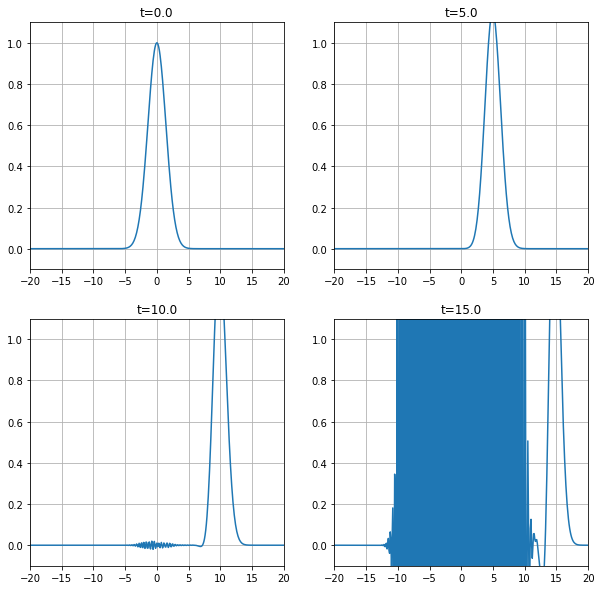

In [ ]:
# Forward Time Centered Space Method
for n in range(len(T)-1):
    for j in range(1,len(X)-1):
        U[n+1,j] = U[n,j] - K*(U[n,j+1] - U[n,j-1])/2

fig = plt.figure(figsize=[10,10])
axs = fig.subplots(nrows=2, ncols=2)
times = [0,50,100,150]
idx = [(0,0),(0,1),(1,0),(1,1)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,U[times[i]])
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(-.1,1.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

### Upwind and Downwind Schemes:

FTCS fails due to the unconditional instability, and hence we require a different finite difference method.

Trying out forward time and backward space,
$$U^{n+1}_j = U^{n}_j - a\frac{\Delta t}{\Delta x} (U^{n}_{j} - U^{n}_{j-1})$$

Its Von-Neumann analysis gives $\kappa = \frac{a Δt}{Δx}$,

$$|A|^2 = \lvert \frac{U^{n+1}_{j}}{U^{n}_{j}} \rvert^2 = 1 + 2\kappa (\kappa-1)(1-cos(kΔx)) \leq  1 + 4\kappa(\kappa-1)$$

Requiring $|A|^2\leq1$ gives us $0 \leq \frac{aΔt}{Δx} \leq 1$.

Here notice that the temporal and spacial spacings are +ve, so the stability of the scheme depends upon the sign of $a$, in particular $a$>0. In other words it depends on the direction in which the solution moves. $a$>0 corresponds to the solution moving in the positive $x$ (right) direction. This is called the "Upwind" scheme. Additionally, for these solutions, only the left boundary condition needs to be specified.


For left moving waves, taking backward spacial differences leads to unstable numerical solutions. What gives stable solutions is the forward time forward space method. Similar Von-Neumann analysis makes it clear why it is so. The condition we get in that case is $-1 \leq \frac{aΔt}{Δx} \leq 0$

We hence find that we need to take into account of the direction of propagation while using a finite difference expression for the spacial derivative. In particular, backward difference is used for a right moving solution and forward difference is used for a left moving solution. Implementing this in the following code block leads to the correct evolution.

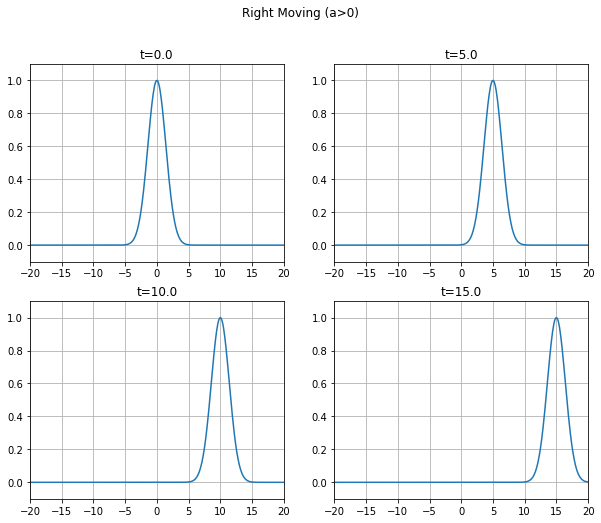

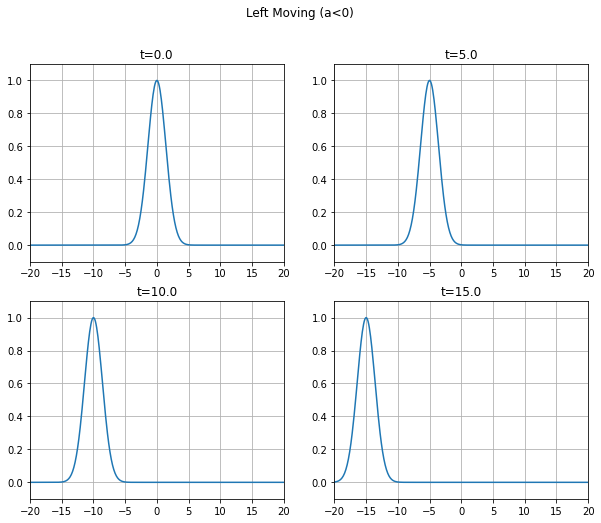

In [ ]:
# FT F/B D Method
for n in range(len(T)-1):
    for j in range(1,len(X)-1):
        U[n+1,j] = U[n,j] - K*(a+abs(a))*(U[n,j] - U[n,j-1])/2 \
        - K*(a-abs(a))*(U[n,j+1] - U[n,j])/2

fig = plt.figure(figsize=[10,8])
axs = fig.subplots(nrows=2, ncols=2)
fig.suptitle("Right Moving (a>0)")
times = [0,50,100,150]
idx = [(0,0),(0,1),(1,0),(1,1)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,U[times[i]])
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(-.1,1.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

print("\n")

a *=-1
for n in range(len(T)-1):
    for j in range(1,len(X)-1):
        U[n+1,j] = U[n,j] - K*(a+abs(a))*(U[n,j] - U[n,j-1])/2 - K*(a-abs(a))*(U[n,j+1] - U[n,j])/2

fig = plt.figure(figsize=[10,8])
axs = fig.subplots(nrows=2, ncols=2)
fig.suptitle("Left Moving (a<0)")
times = [0,50,100,150]
idx = [(0,0),(0,1),(1,0),(1,1)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,U[times[i]])
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(-.1,1.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

## Burgers's Equation

Now moving to the a more general (non-linear) case, $f(u) = u^2/2$. The conservation equation with this choice is called the **inviscid Burgers' Equation**.

Since it is a non-linear differntial equation, the Von-Neumann method of stability analysis cannot directly be carried out for this.

Assuming sufficient smoothness of $u(x,t)$, the equation can be recast as,
$$u_t + (\frac{u^2}{2})_x = u_t + uu_x = 0$$

NOTE: Except for the specific case of sufficiently smooth $u(x,t)$, the first equality **does not** hold! In reality, the are not even numerically equivalent. But for the following analysis, they are being equated at the moment.

In $u_t + uu_x = 0$, one draw a similarity to the advection equation and see that the advection speed in this case is given by the function $u(x,t)$ itself. Which implies that the choice of the finite difference approximation for the spacial derivative depends on the sign of $u(x,t)$. Again $u>0$ correspond to a right moving solution and $u<0$ to a left moving solution.

Even though Von-Neumann analysis cannot directly be applied, one can apply this analysis to $u_t  + A{(u)} u_x = 0 \sim u_t  + a u_x = 0$ for stability analysis, where $A(u)$ is,
$$ A(u) =  
\left\{
    \begin{array}{lr}
        max_x(u) & ; &  u>0 \\
        min_x(u) & ; &  u<0 \\
    \end{array}
    \right \}
$$
And hence one can again obtain the CFL (like) condition for left moving and right moving parts, and the temporal and spacial spacing that need to be chosen. 

In [ ]:
# Functionto decompose u into right moving and left moving parts
def decomp_rt_lt(U):
    Up = U.copy()
    Um = U.copy()
    for i in range(len(U)):
        if Up[i]<0:
            Up[i]=0
        if Um[i]>0:
            Um[i]=0
    return Up, Um


# Function that checks that CFL condition for the Burgers equation
def Burgers_CFL_chk(Um,Up,del_x,del_t):
    K = np.max(Up)*del_t/del_x
    if K*(K-1) <= 0:
        # print("CFL Condition for Up Satisfied!")
        flagp = True
    else:
        print("CFL Condition for Up Violated!")
        flagp = False
    
    K = np.min(Um)*del_t/del_x
    if K*(K+1) <= 0:
        # print("CFL Condition for Um Satisfied!")
        flagm = True
    else:
        print("CFL Condition for Um Violated!")
        flagm = False
    
    if flagp and flagm:
        print("CFL Condition Satisfied!")
        return True
    else:
        print("CFL Condition Violated")
    return False

In [ ]:
del_t = 0.1
del_x = 0.1
K = (del_t/del_x)

x_i = -20
x_f = 20
t_i = 0
t_f = 20

eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)

CFL Condition Satisfied!


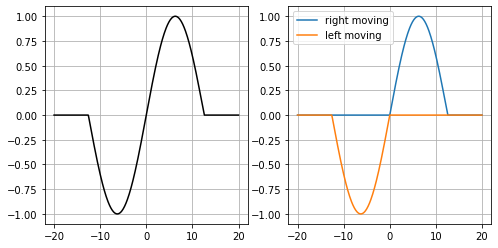

In [ ]:
U = np.zeros(shape=(len(T), len(X)))

# # TRIANGLE WAVE
# wid = 1
# U = np.zeros(shape=(len(T), len(X)))
# for i in range(len(U[0])):
#     if X[i]>-wid and X[i]<0:
#         U[0,i] = wid+X[i]
#     elif X[i]>0 and X[i]<wid:
#         U[0,i] = wid-X[i]
#     else:
#         U[0,i] = 0

# SINE PULSE
wid = 4
for i in range(len(U[0])):
    if X[i]>-wid*np.pi and X[i]<wid*np.pi:
        U[0,i] = mt.sin(1.0/wid*X[i])
    else:
        U[0,i] = 0

# # QUADRATIC PULSE
# wid = 4
# for i in range(len(U[0])):
#     if X[i]>-wid and X[i]<wid:
#         U[0,i] = wid**2-X[i]**2
#     else:
#         U[0,i] = 0

# # GAUSSIAN PULSE
# U[0] = np.exp(-X**2/5)

# # UP-STEP FUNCTION WAVE
# for i in range(len(U[0])):
#     if X[i]>0:
#         U[0,i] = 1
#     else:
#         U[0,i] = 0

# # DOWN-STEP FUNCTION WAVE
# for i in range(len(U[0])):
#     if X[i]>0:
#         U[0,i] = 0
#     else:
#         U[0,i] = 1

# # RECTIFIED SINE WAVE
# for i in range(len(U[0])):
#     if X[i]>0 and X[i]<2*np.pi:
#         U[0,i] = np.sin(X[i]/2)
#     else:
#         U[0,i] = 0

Up, Um = decomp_rt_lt(U[0])

# CHECK FOR CFL CONDITION
Burgers_CFL_chk(Up=Up, Um=Um, del_t=del_t, del_x=del_x)

fig = plt.figure(figsize=[8,4])
axs = fig.subplots(nrows=1,ncols=2)

axs[0].plot(X,U[0], color="black")
axs[0].grid()

axs[1].plot(X,Up, label="right moving")
axs[1].plot(X,Um, label="left moving")
axs[1].grid()
axs[1].legend()
plt.show()

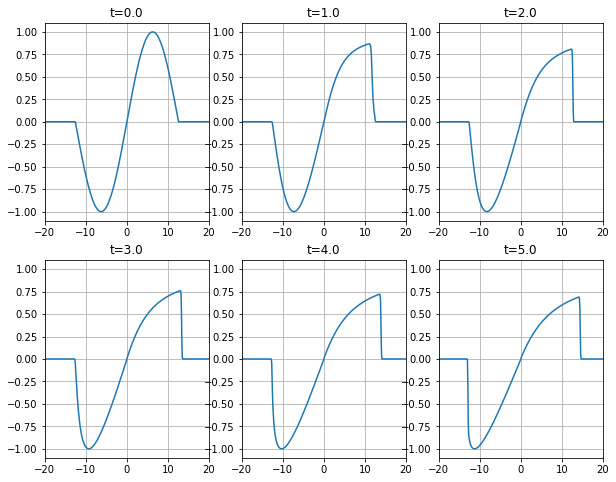

In [ ]:
for n in range(len(T)-1):
    Up, Um = decomp_rt_lt(U[n])
    for j in range(1,len(X)):
        Up[j] = Up[j] - K*(Up[j]**2 - Up[j-1]**2)/2

    for j in range(0,len(X)-1):
        Um[j] = Um[j] - K*(Um[j+1]**2 - Um[j]**2)/2
    
    for j in range(0,len(X)):
        U[n+1,j] = Up[j] + Um[j]

fig = plt.figure(figsize=[10,8])
axs = fig.subplots(nrows=2, ncols=3)
times = np.arange(0,60,10)
idx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,U[times[i]])
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(np.min(U[0])-.1,np.max(U[0])+.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

We can hence obseve the onset of shock formation after $t\sim 2$ seconds.

## Future Items of Study:
1. Further studying the theory and numerics behing hyperbolic PDEs. In particular, delving deeper into shocks, and entropy solutions (like the infinitesimal viscosity method for the Burgers' equation).
2. Studying other finite differnce schemes to solve hyperbolic PDEs, like the Lax-Friedrich's method and the Lax-Wendroff Method.
3. Studying higher dimensional generalizations of these (1+1)-D hyperbolic PDEs, like the 2D Euler equations.
4. The larger goal is to eventually apply all this formalism to a problem in gravitational physics. For example, numerically solving some simplified version of the ADM-equations of general relativity, or numerically solving the partial differential equations that arise from applying scalar perturbation theory in Black Hole spacetimes. 